# Unsupervised Learning - Data Clustering
#### Edmar Junyor Bevilaqua

### K-means - Demo 3

* Comparison of K-means and Mini Batch K-means results

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets import make_blobs

## %matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Creating synthetic dataset with 1000 samples

In [2]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,7.415416,-5.293543,2
1,-3.898435,-0.410129,0
2,-6.065070,-0.514075,0
3,-7.980452,8.115292,3
4,10.479860,-0.900095,5


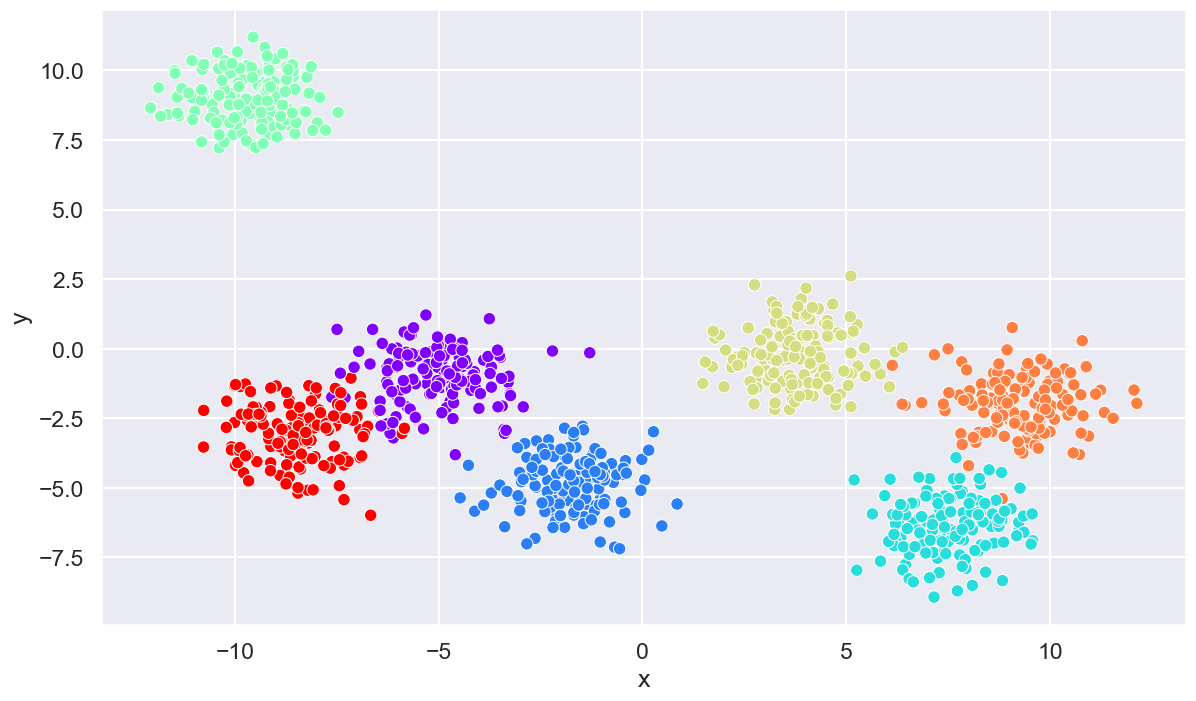

In [3]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

### Creating function to plot with KMeans or with MiniBatchKMeans

In [8]:
import warnings

def train_and_plot(data, k=3, method='default', verbose=0, random_state=133, plot=True):
    warnings.filterwarnings('ignore')
    
    # We copy the data from the original dataset
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    if method ==  'minibatch':
        model = MiniBatchKMeans(n_clusters=k, random_state=random_state, verbose=verbose, n_init=10)
    else:
        model = KMeans(n_clusters=k, random_state=random_state, verbose=verbose, n_init=10)
        
    model.fit(data_copy)
    
    if plot:    
        data_copy['cluster_labels'] = model.labels_
        _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

        centroids = model.cluster_centers_
        centroids_x = centroids[:,0]
        centroids_y = centroids[:,1]

        _ = plt.scatter(centroids_x, centroids_y, color='black', s=100)
    
    warnings.filterwarnings('default')
    
    return model

### KMeans

Inertia: 1886.0331783506122
Tempo (s): 0.31995177268981934


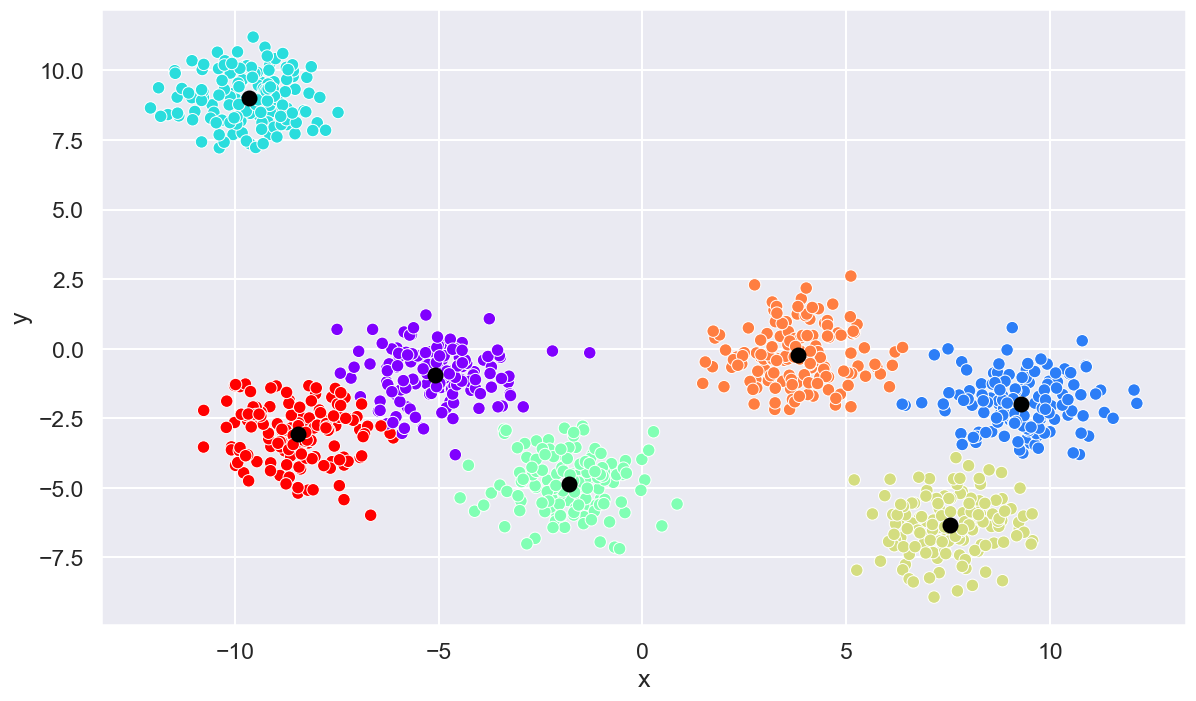

In [17]:
start = time.time()
clustering = train_and_plot(df, k=7)
print('Inertia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)

### Mini Batch K-means

Inertia: 1887.5916923423067
Tempo (s): 0.4153323173522949


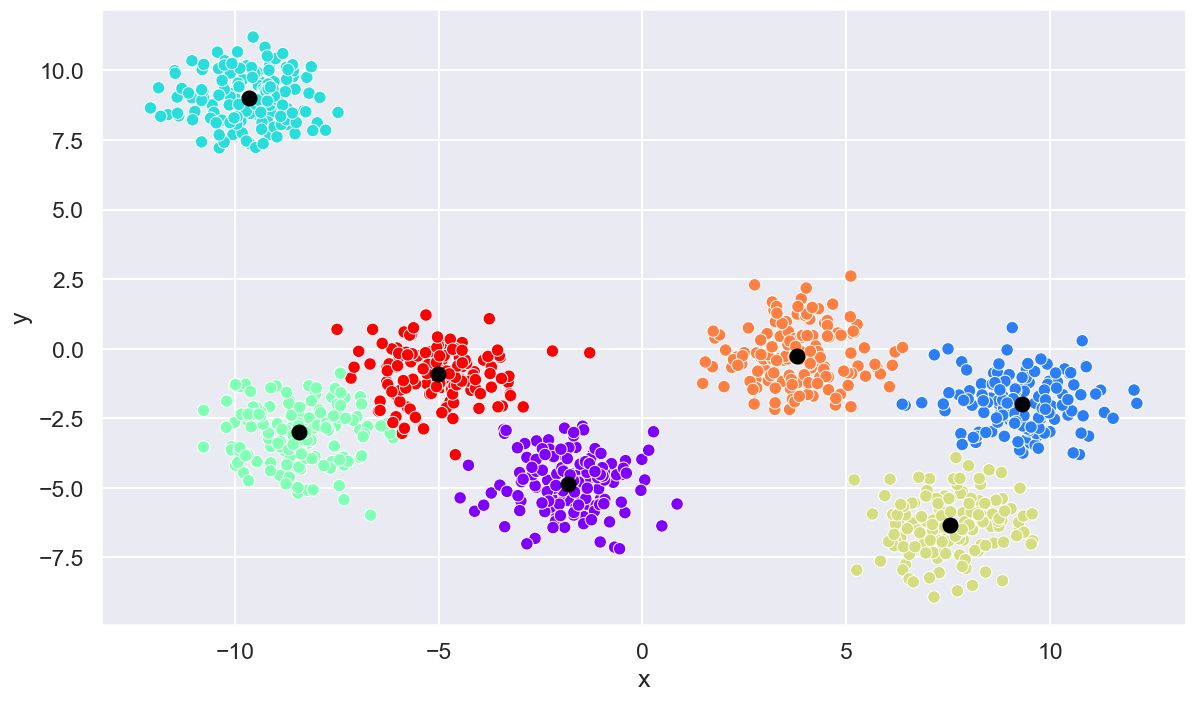

In [18]:
start = time.time()
clustering = train_and_plot(df, k=7, method='minibatch')
print('Inertia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)

### Other runs
Runs with results other than K-means.

In [10]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

,x,y,label
0,3.775776,-2.551136,4
1,4.798597,-1.459384,5
2,3.910070,1.590275,0
3,5.554648,1.009466,0
4,-10.997360,2.443557,6


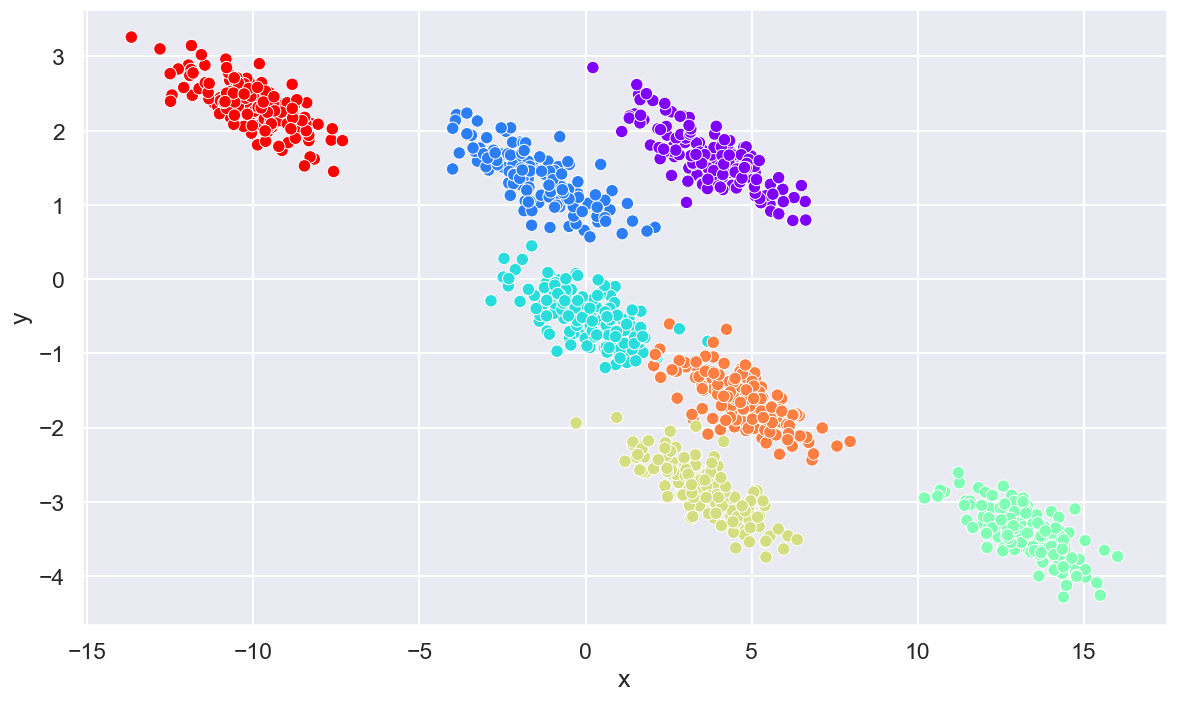

In [14]:
_ = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

K-means
Inertia: 1240.095056983202
Tempo (s): 0.3288555145263672


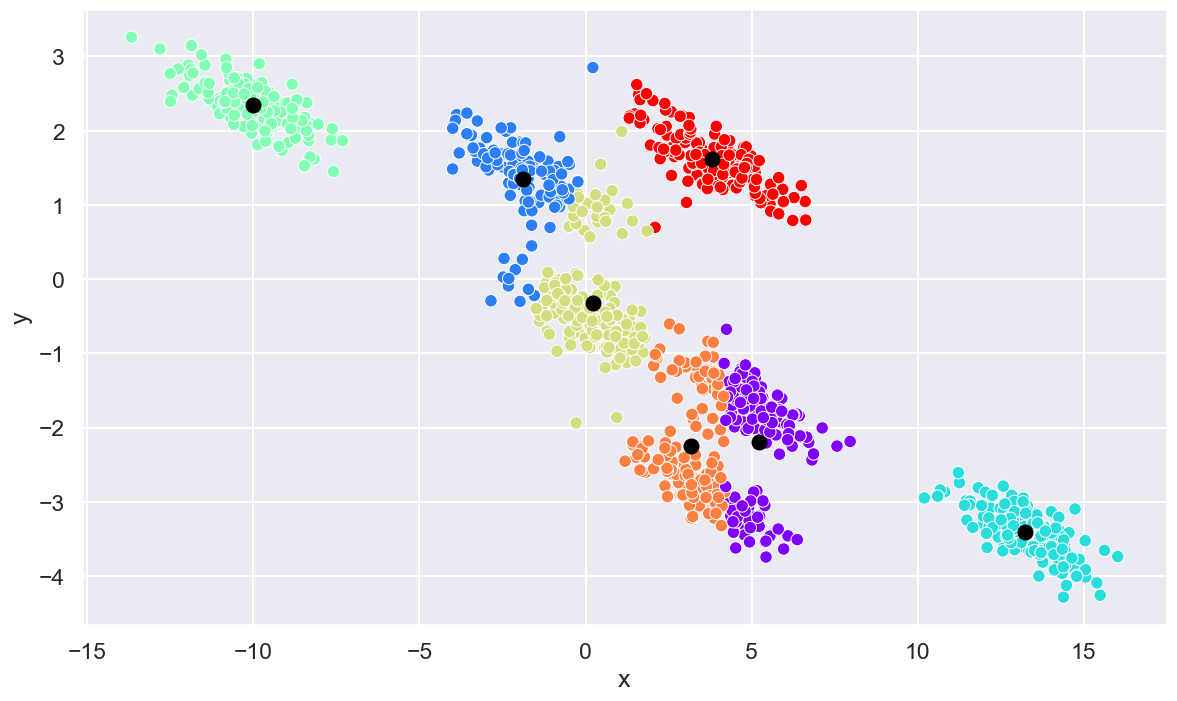

In [15]:
start = time.time()
clustering = train_and_plot(df_transformed, k=7)
print('K-means')
print('Inertia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)

Mini Batch k-means
Inertia: 1240.9381208867333
Tempo (s): 0.4396545886993408


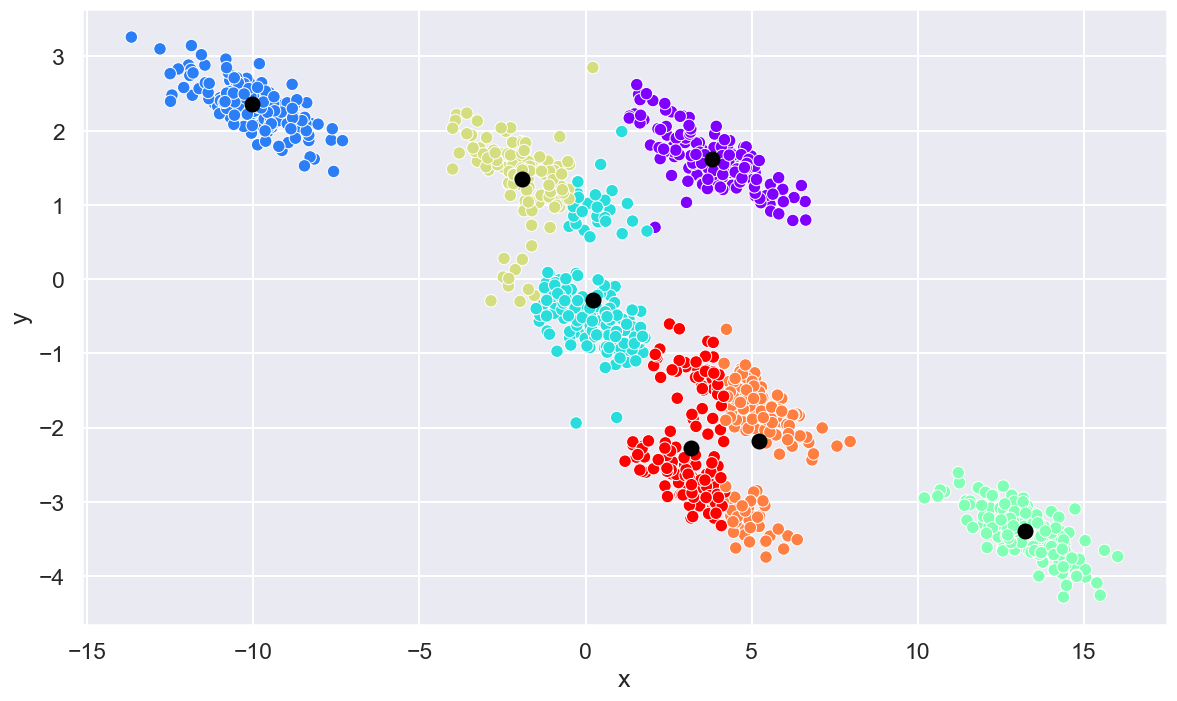

In [16]:
start = time.time()
clustering = train_and_plot(df_transformed, k=7, method='minibatch')
print('Mini Batch k-means')
print('Inertia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)

### Execution with a database of 1M records

In [19]:
X, y = make_blobs(n_samples=1000000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,-9.507284,7.336711,3
1,-5.079856,-2.823110,0
2,-2.155830,-5.106045,1
3,1.812118,-0.337578,4
4,8.453084,-5.795128,2


In [21]:
start = time.time()
clustering = train_and_plot(df, k=7, plot=False)
print('K-means')
print('Inertia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)
print()
start = time.time()
clustering = train_and_plot(df, k=7, method='minibatch', plot=False)
print('Mini Batch k-means')
print('Inertia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)

K-means
Inertia: 1963947.9078455057
Tempo (s): 2.7079687118530273

Mini Batch k-means
Inertia: 1964100.2138058404
Tempo (s): 0.7925221920013428


### Execução com base de dados de 10M de registros

In [22]:
X, y = make_blobs(n_samples=10000000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,5.374128,-5.825290,2
1,4.316808,1.193106,4
2,7.852112,-5.857027,2
3,-3.416934,-4.810063,1
4,4.635450,0.194526,4


In [23]:
start = time.time()
clustering = train_and_plot(df, k=7, plot=False)
print('K-means')
print('Inertia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)
print()
start = time.time()
clustering = train_and_plot(df, k=7, method='minibatch', plot=False)
print('Mini Batch k-means')
print('Inertia:', clustering.inertia_)
print('Tempo (s):', time.time() - start)

K-means
Inertia: 19613259.685603596
Tempo (s): 26.772114992141724

Mini Batch k-means
Inertia: 19614450.122166466
Tempo (s): 1.0747480392456055


## Conclusion:
Despite the documentation says that MiniBatchKMeans have higher inertia when compared to the original KMeans, in our tests we verified that MiniBatchKMeans achieved almost the same results as KMeans, with a much lower runtime.